In [2]:
import parser 
import pandas as pd
import itertools
import numpy as np
import os 
import matplotlib.pyplot as plt

In [3]:
def is_consistant2(ballot, perm):

    if len(ballot) == 0:
        return True
    c = ballot[0]
    index = 0
    for i in range(len(perm)):
        if (c == perm[i]):
            index = i
            break
    def check(i, j, p):
        '''
        i: index in the ballot
        j: index in the permutation
        p = parent 
        '''
        if j < 0 or j > len(perm):
            return False
        
        if (i == len(ballot) - 1):
            return True
        
        if (i == 0):
            if (j + 1 >= len(perm)):
                if ballot[i + 1] != perm[j - 1]:
                    return False 
            if j - 1 < 0:
                if ballot[i + 1] != perm[j + 1]:
                    return False
            if ballot[i + 1] != perm[j - 1] and ballot[i + 1] != perm[j + 1]:
                return False

        if p != j + 1 and j + 1 < len(perm) and ballot[i + 1] == perm[j + 1]:
            return check(i + 1, j + 1, j)
        elif p != j - 1 and ballot[i + 1] == perm[j - 1]:
            return check(i + 1, j - 1, j)
        else:
            if p != j:
                return check(i, p, p)
            else:
                return False
    return check(0, index, -1)


In [4]:
def is_consistant(ballot, perm):
    if len(ballot) == 0 or len(ballot) == 1:
        return True
    x = 0 
    v = 0.25
    i = 1
    while (i < len(ballot)):
        if ballot[i] < ballot[i - 1]:
            x -= (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        else:
            x += (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        v *= 0.5
        i += 1
    l = []
    if abs(x) >= 0.5 or x == 0:
        return False 
    x += ballot[0]
    for c in ballot:
        l.append(abs(c - x))
    if(all(l[i] <= l[i + 1] for i in range(len(l) -  1))):
        return True 
    return False

In [5]:
def dim():
    df = pd.read_csv("MatchedElections.csv")
    directory = "dataverse_files"
    d_p = {}
    d_nonp = {}
    label  = 0
    for filename in os.listdir(directory):
        #print(filename)
        label += 1
        ballots, candidates = parser.parser(os.path.join(directory, filename))
        x = len(candidates)
        partisan = False
        if x <= 7:
            '''if filename not in df["filename"]:
                #print(filename)
                continue'''
            s = "filename==" + "'" + filename + "'"
            #print(s)
            try:
                if int(df.query(s)["Partisan"].tolist()[0]) == 1:
                    partisan = True
                elif int(df.query(s)["Partisan"].tolist()[0]) == 0:
                    partisan = False
            except:
                continue
            #print(partisan)
            
            if partisan:
                if x not in d_p:
                    d_p[x] = []
            else:
                if x not in d_nonp:
                    d_nonp[x] = []
            #print(d_p)
            #print(d_nonp)
            perms = list(itertools.permutations(candidates))
            #most consistant permutation
            mcp = None
            c_mcp = 0
            l = [i for i in range(1, x + 1)]
            for perm in perms:
                temp = {}
                i = 1
                for candidate in perm:
                    temp[candidate] = i
                    i += 1
                c = 0
                for b in ballots:
                    b_num = []
                    for candidate in b:
                        b_num.append(temp[candidate])
                    if (is_consistant(b_num, l)):
                        c += ballots[b]
                if mcp is None or c > c_mcp:
                    c_mcp = c
                    mcp = perm
            if partisan:
                d_p[x].append(c_mcp/sum(ballots.values()))
            else:
                d_nonp[x].append(c_mcp/sum(ballots.values()))
            
            '''print(filename)
        print("MCP: ", mcp)
        print ("Consistanty: ", c_mcp, "%: ", (100*(c_mcp/sum(ballots.values()))))
        print()'''
    #print(d)
    return d_p, d_nonp

In [6]:
d_p, d_nonp = dim()


In [11]:
print(d_nonp)

{}


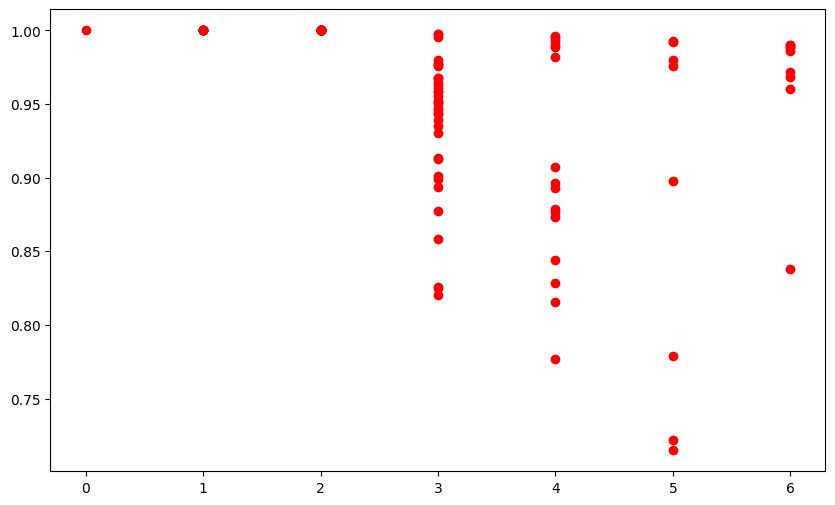

In [7]:
plt.figure(figsize=(10, 6))

for x, y_values in d_p.items():
    for y in y_values:
        plt.scatter(x, y, color='r')

"""for x, y_values in d_nonp.items():
    for y in y_values:
        plt.scatter(x, y, color='b')"""
plt.show()

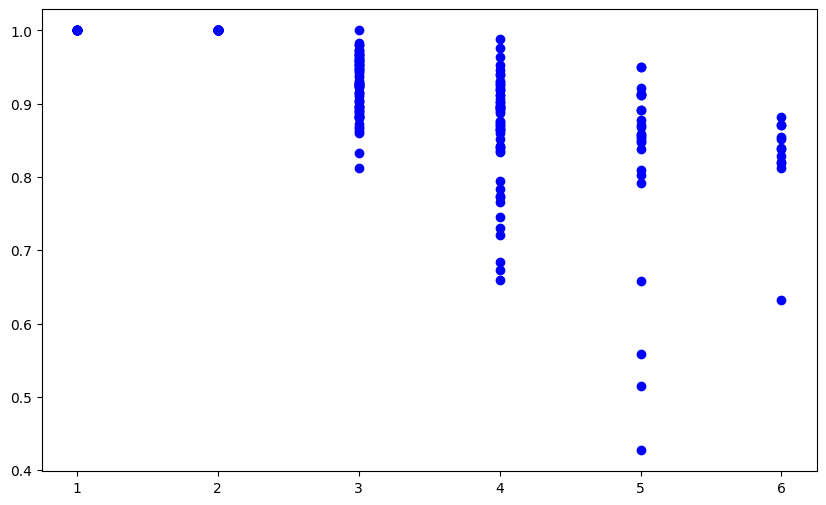

In [8]:
plt.figure(figsize=(10, 6))

'''for x, y_values in d_p.items():
    for y in y_values:
        plt.scatter(x, y, color='r')'''

for x, y_values in d_nonp.items():
    for y in y_values:
        plt.scatter(x, y, color='b')
plt.show()

In [12]:
p_counter = 0 
for n in d_p:
    p_counter += len(d_p[n])
nonp_counter = 0 
for n in d_nonp:
    nonp_counter += len(d_nonp[n])
print(p_counter)
print(nonp_counter)
print(p_counter+nonp_counter)

122
239
361


In [39]:
# d1: partisan, d2: nonpartisan
d1, d2 = dim()

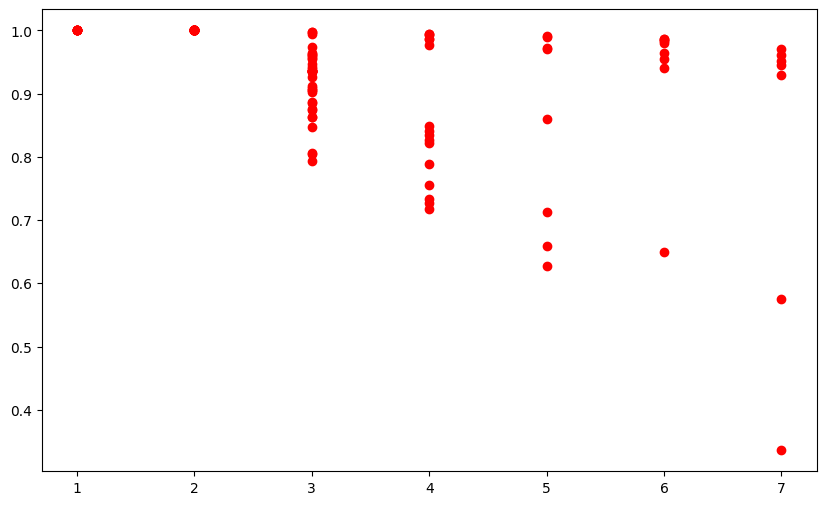

In [44]:
plt.figure(figsize=(10, 6))

for x, y_values in d1.items():
    for y in y_values:
        if x != 0:
            plt.scatter(x, y, color='r')

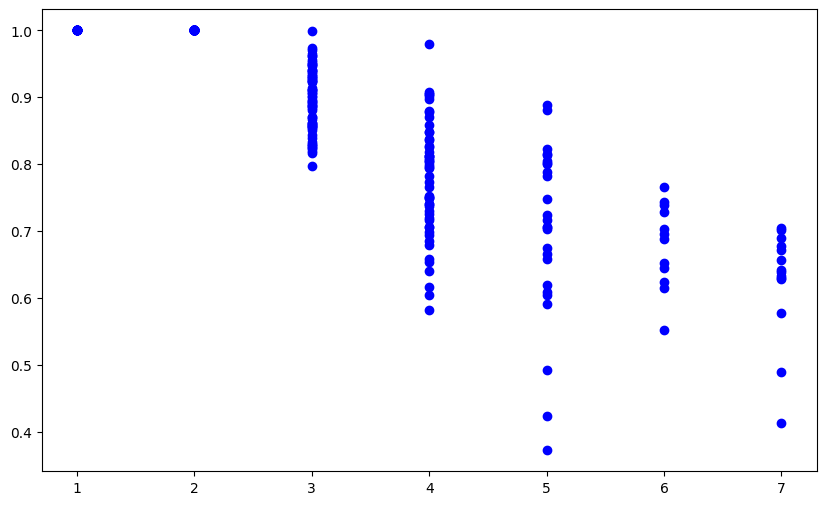

In [43]:
plt.figure(figsize=(10, 6))

'''for x, y_values in d_p.items():
    for y in y_values:
        plt.scatter(x, y, color='r')'''

for x, y_values in d2.items():
    for y in y_values:
        plt.scatter(x, y, color='b')
plt.show()

In [57]:
import seaborn as sns

df = pd.DataFrame(columns=["candidates", "gamma", "partisan"])
for x, y_values in d1.items():
    for y in y_values:
        df.loc[len(df)] = [x, y, True]
for x, y_values in d2.items():
    for y in y_values:
        df.loc[len(df)] = [x, y, False]
df.to_csv("gamma.csv", index=False)

<Axes: xlabel='candidates', ylabel='gamma'>

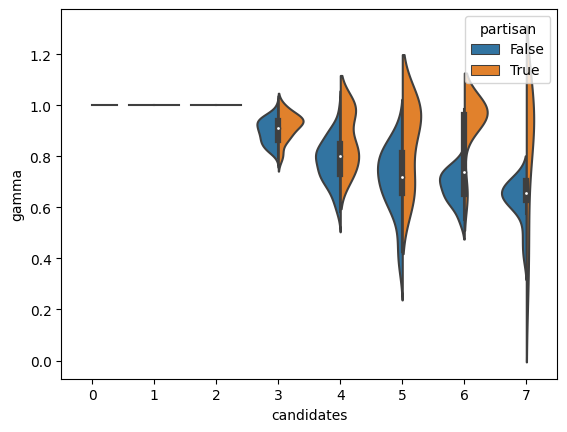

In [56]:
sns.violinplot(data=df, x="candidates", y="gamma", hue="partisan", split=True)

('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.')  :   0.7047953903727421
('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Hoar, William R.S.', 'Bond, Tiffany L.')  :   0.61705778246126
('REP Poliquin, Bruce', 'Bond, Tiffany L.', 'DEM Golden, Jared F.', 'Hoar, William R.S.')  :   0.7862677150461368
('REP Poliquin, Bruce', 'Bond, Tiffany L.', 'Hoar, William R.S.', 'DEM Golden, Jared F.')  :   0.6472594874289034
('REP Poliquin, Bruce', 'Hoar, William R.S.', 'DEM Golden, Jared F.', 'Bond, Tiffany L.')  :   0.7884360772234156
('REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.', 'DEM Golden, Jared F.')  :   0.7873046109782623
('DEM Golden, Jared F.', 'REP Poliquin, Bruce', 'Bond, Tiffany L.', 'Hoar, William R.S.')  :   0.609792755914022
('DEM Golden, Jared F.', 'REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.')  :   0.6001904916305273
('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'REP Poliquin, Bruce', 'Hoar, William R.S.')  

<Axes: xlabel='x', ylabel='y'>

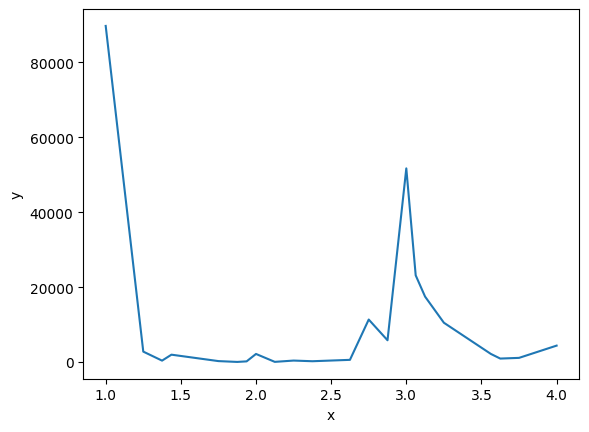

In [27]:
import seaborn as sns

filename = "dataverse_files/Maine_11062018_CongressionalDistrict2.csv"
ballots, candidates = parser.parser(filename)

perms = list(itertools.permutations(candidates))
#most consistant permutation
mcp = None
c_mcp = 0
l = [i for i in range(1, len(candidates) + 1)]
for perm in perms:
    temp = {}
    i = 1
    for candidate in perm:
        temp[candidate] = i
        i += 1
    c = 0
    for b in ballots:
        b_num = []
        for candidate in b:
            b_num.append(temp[candidate])
        if (is_consistant(b_num, l)):
            c += ballots[b]
    if mcp is None or c > c_mcp:
        c_mcp = c
        mcp = perm
    print(perm, " :  ", c/sum(ballots.values()))
print("gamma: ", c_mcp/sum(ballots.values()))
print("mcp: ", mcp)
positions = {}
temp = {}
i = 1
for candidate in mcp:
    temp[candidate] = i
    i += 1
c = 0
ballot_index = {}
index = 1
for b in ballots:
    ballot = []
    for candidate in b:
        ballot.append(temp[candidate])
    if len(ballot) == 0 or is_consistant(ballot, mcp) is False:
        continue

    if b not in ballot_index:
        ballot_index[b] = index 
        index += 1

    x = 0 
    v = 0.25
    i = 1
    while (i < len(ballot)):
        if ballot[i] < ballot[i - 1]:
            x -= (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        else:
            x += (v * min(abs(ballot[i] - ballot[0]), abs(ballot[i] - ballot[i - 1])))
        v *= 0.5
        i += 1
    x += ballot[0]
    if x not in positions:
        positions[x] = 0
    print(b, " : ", x)
    positions[x] += ballots[b]
p_df = pd.DataFrame(columns=["x", "y"])
for p in positions:
    p_df.loc[len(p_df)] = [p, positions[p]]

sns.lineplot(data=p_df, x="x", y="y")


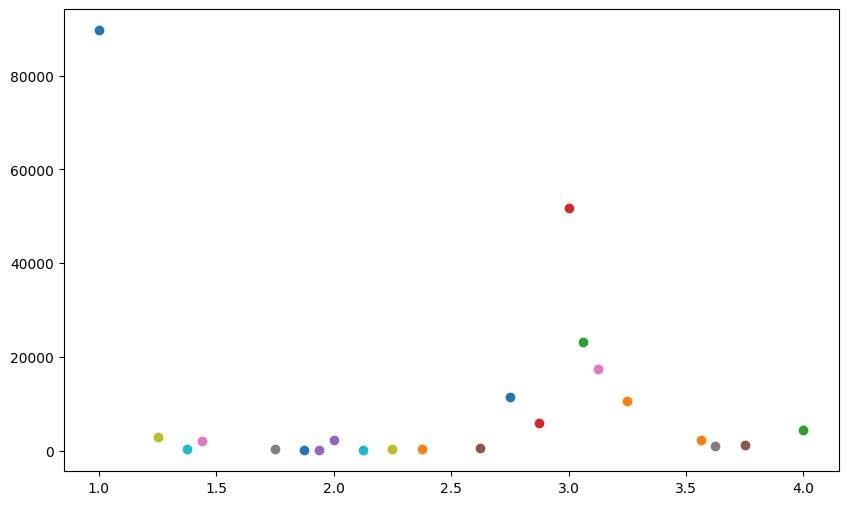

In [24]:
plt.figure(figsize=(10, 6))

for x, y in positions.items():
    plt.scatter(x, y)